In [1]:
import re
import numpy as np
import collections
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.datasets import imdb

from keras.utils.np_utils import to_categorical

import warnings
warnings.filterwarnings('ignore')
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv(r'C:\Users\Hrishikesh Nikam\Desktop\internship\dataset\mbti_1.csv',encoding='latin-1')
print(df.head(10))
print("*"*40)
print(df.info())

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB
None


In [2]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head())

   type                                              posts  words_per_comment
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34


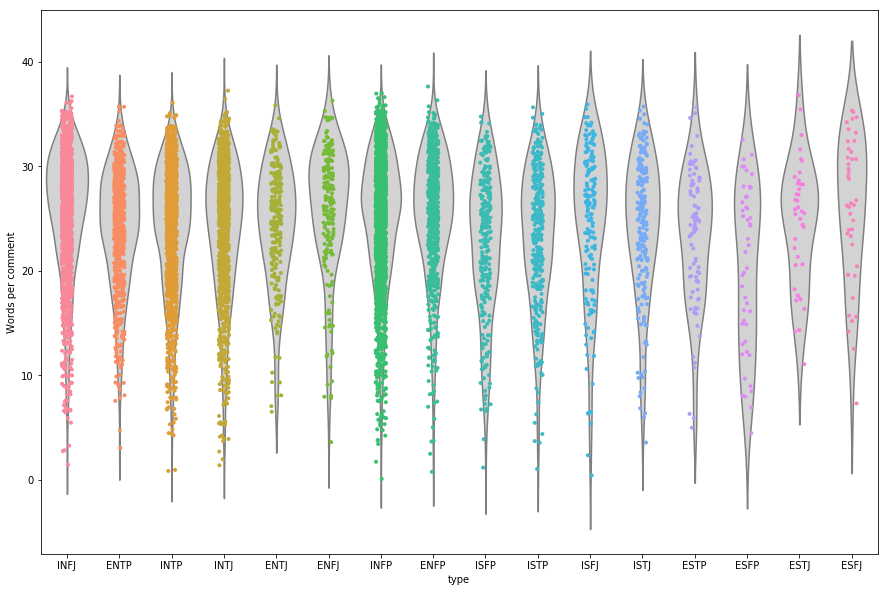

In [3]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

<Figure size 1080x720 with 0 Axes>

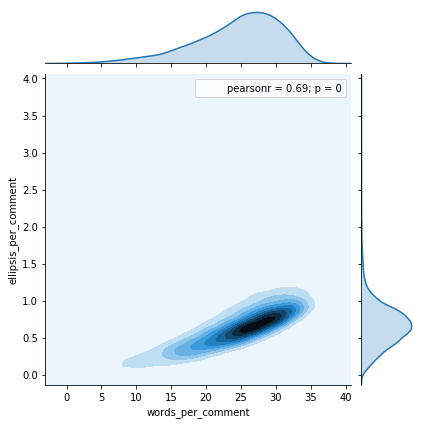

In [4]:
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)

plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df, kind='kde')

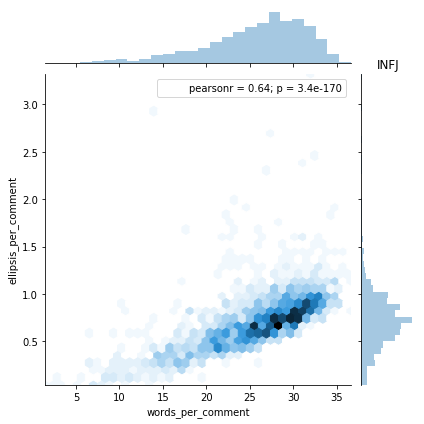

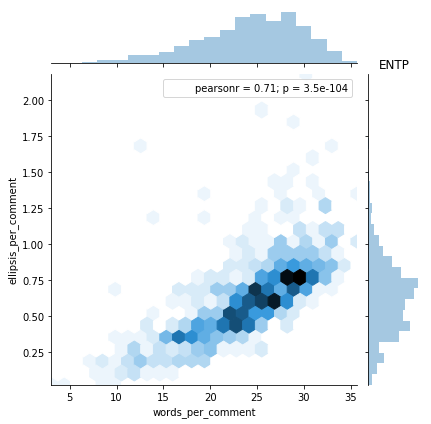

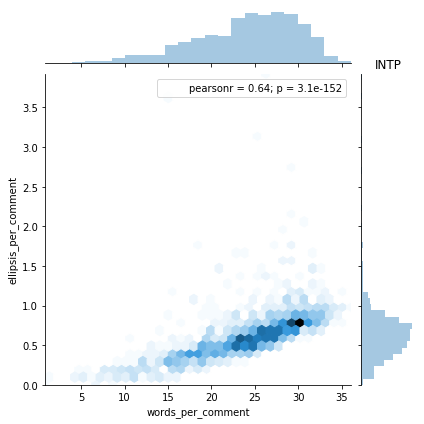

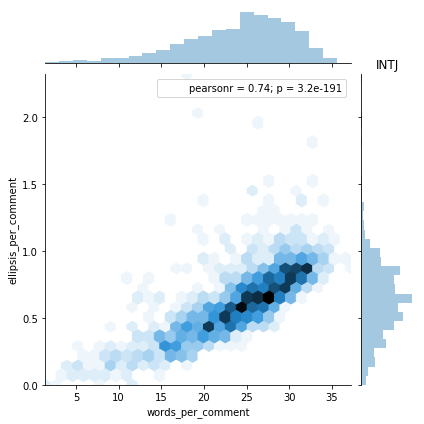

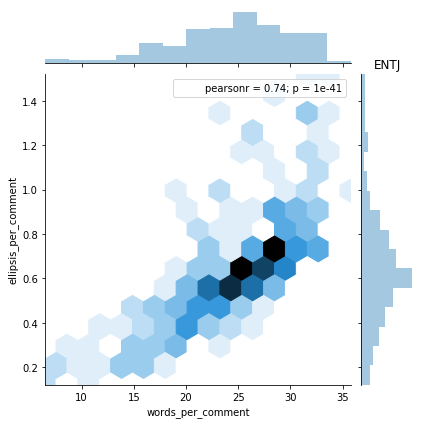

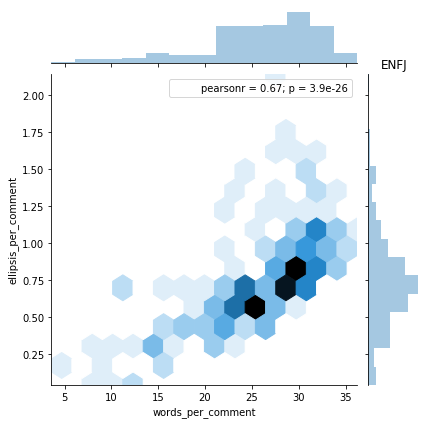

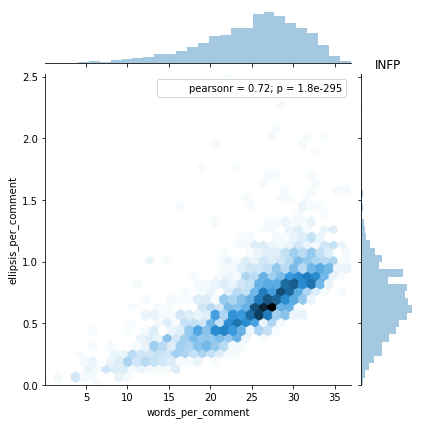

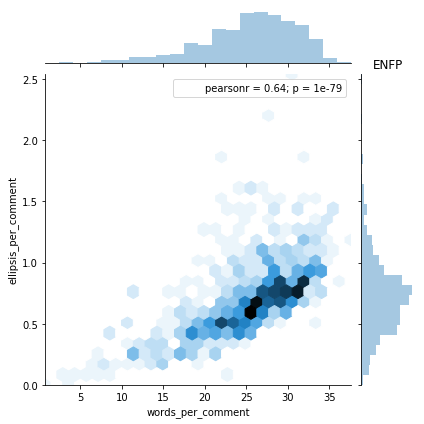

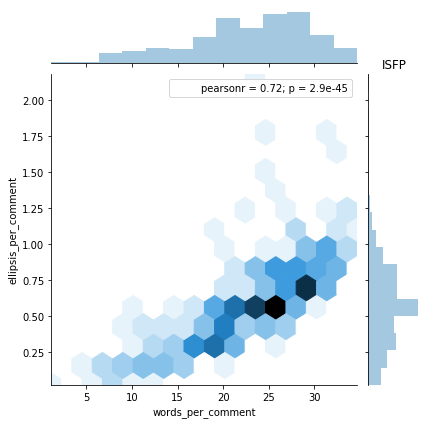

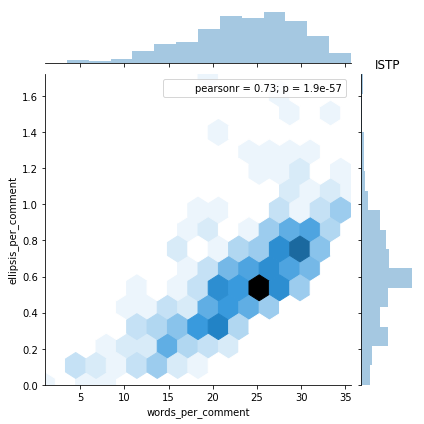

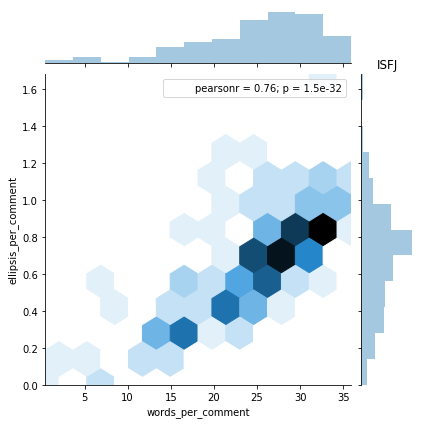

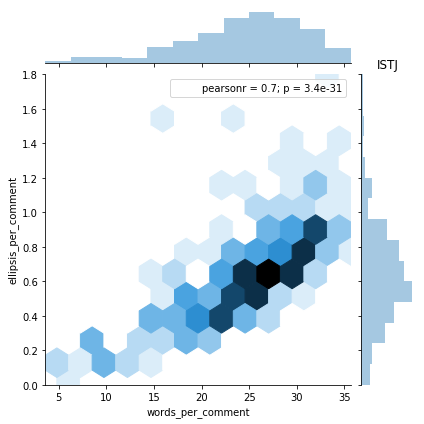

In [5]:
i = df['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        sns.jointplot(x='words_per_comment', y='ellipsis_per_comment', data=df_2, kind="hex")
        plt.title(i[k])
        k+=1

0.6399999442273467
0.7054115769933563
0.641737001660605
0.741848895779298
0.7424094041411351
0.6701821483335171
0.72235763801547
0.6421091262095923
0.7239277102991736
0.7305827044937656
0.760423088098855
0.6974345006277058
[0.760423088098855, 0.7424094041411351, 0.741848895779298, 0.7305827044937656, 0.7239277102991736, 0.72235763801547, 0.7054115769933563, 0.6974345006277058, 0.6701821483335171, 0.6421091262095923, 0.641737001660605, 0.6399999442273467]
['INFJ', 'INTP', 'ENFP', 'ENFJ', 'ISTJ', 'ENTP', 'INFP', 'ISFP', 'ISTP', 'INTJ', 'ENTJ', 'ISFJ']


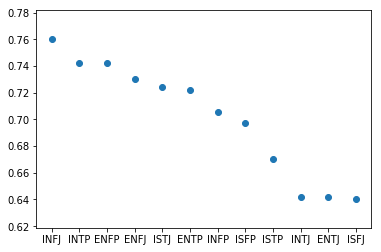

In [6]:
i = df['type'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_comment'], y=df_2['ellipsis_per_comment'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1


TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)

In [7]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
print(df.head(20))

    type                                              posts  \
0   INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1   ENTP  'I'm finding the lack of me in these posts ver...   
2   INTP  'Good one  _____   https://www.youtube.com/wat...   
3   INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4   ENTJ  'You're fired.|||That's another silly misconce...   
5   INTJ  '18/37 @.@|||Science  is not perfect. No scien...   
6   INFJ  'No, I can't draw on my own nails (haha). Thos...   
7   INTJ  'I tend to build up a collection of things on ...   
8   INFJ  I'm not sure, that's a good question. The dist...   
9   INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...   
10  INFJ  'One time my parents were fighting over my dad...   
11  ENFJ  'https://www.youtube.com/watch?v=PLAaiKvHvZs||...   
12  INFJ  'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm n...   
13  INTJ  'Fair enough, if that's how you want to look a...   
14  INTP  'Basically this...  https://youtu.be/1pH5c1Jk

In [8]:
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = pd.get_dummies(df['type']).values
df['posts'] = df['posts'].apply(lambda x: x.lower())
df['posts'] = df['posts'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
max_fatures = 2000
tokenizer = Tokenizer(nb_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['posts'].values)
X = tokenizer.texts_to_sequences(df['posts'].values)
X = pad_sequences(X)

print(y.shape)
print(X.shape)
# Y = pd.get_dummies(df['type']).values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, random_state=5)
print('Shape of training samples:',X_train.shape,y_train.shape)
print('Shape of testing samples:',X_test.shape,y_test.shape)

# sgd = SGDClassifier(max_iter=5, tol=None)
# sgd.fit(X_train, y_train)
# Y_pred = sgd.predict(X_test)
# print(Y_pred)
# sgd.score(X_train, y_train)
# acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
# print(round(acc_sgd,2,), "%")


(8675, 16)
(8675, 1704)
Shape of training samples: (7807, 1704) (7807, 16)
Shape of testing samples: (868, 1704) (868, 16)


In [9]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.9 %


In [11]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

23.45 %


In [47]:
XX = df.drop(['type','posts','I-E'], axis=1).values
yy = df['I-E'].values

print(yy.shape)
print(XX.shape)

XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size = 0.33, random_state=5)

# sgdd = SGDClassifier(max_iter=5, tol=None)
# sgdd.fit(XX_train, yy_train)
# Y_predd = sgdd.predict(XX_test)
# sgdd.score(XX_train, yy_train)
# acc_sgdd = round(sgdd.score(XX_train, yy_train) * 100, 2)
# print(round(acc_sgdd,2,), "%")

(8675,)
(8675, 10)


In [48]:
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XX_train, yy_train)

Y_predictionn = random_forestt.predict(XX_test)

random_forestt.score(XX_train, yy_train)
acc_random_forestt = round(random_forestt.score(XX_train, yy_train) * 100, 2)
print(round(acc_random_forestt,2,), "%")

100.0 %


In [15]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(XX_train, yy_train)

Y_predd = knnn.predict(XX_test)

acc_knnn = round(knnn.score(XX_train, yy_train) * 100, 2)
print(round(acc_knnn,2,), "%")

83.73 %


In [49]:
new_column=[]
for z in range(len(df['posts'])):
    prov=df['posts'][z]
    prov2= re.sub(r'[“€â.|,?!)(1234567890:/-]', '', prov)
    prov3 = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', prov)
    prov4 = re.sub(r'[|||)(?.,:1234567890!]',' ',prov3)
    prov5 = re.sub(' +',' ', prov4)
    prov6 = prov5.split(" ")
    counter = Counter(prov6)
    counter2 = counter.most_common(1)[0][0]
    new_column.append(counter2)
df['most_used_word'] = new_column
print(df.head(10))
print(df['most_used_word'].unique())

   type                                              posts  words_per_comment  \
0  INFJ  httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...              11.12   
1  ENTP  im finding the lack of me in these posts very ...              23.40   
2  INTP  good one  _____   httpswwwyoutubecomwatchvfhig...              16.72   
3  INTJ  dear intp   i enjoyed our conversation the oth...              21.28   
4  ENTJ  youre firedthats another silly misconception t...              19.34   
5  INTJ  1837 science  is not perfect no scientist clai...              29.82   
6  INFJ  no i cant draw on my own nails haha those were...              26.58   
7  INTJ  i tend to build up a collection of things on m...              24.46   
8  INFJ  im not sure thats a good question the distinct...              14.76   
9  INTP  httpswwwyoutubecomwatchvw8egj0y8qsim in this p...              24.66   

   http_per_comment  music_per_comment  question_per_comment  img_per_comment  \
0              0.48        

In [63]:
model = Sequential()
model.add(Embedding(max_fatures, 128 ,input_length = X.shape[1], dropout=0.2))
#model.add(LSTM(128))
model.add(LSTM(128, dropout=0.0, recurrent_dropout=0.0,return_sequences=True))
model.add(LSTM(128, dropout=0.0, recurrent_dropout=0.0))

model.add(Dense(16, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1704, 128)         256000    
_________________________________________________________________
lstm_13 (LSTM)               (None, 1704, 128)         131584    
_________________________________________________________________
lstm_14 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                2064      
Total params: 521,232
Trainable params: 521,232
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
text="Pretty much somewhere close to absurdism. Sometimes moments holds value and meaning but tolong time alone and in a negative state Ti will pick that shit apart need to keep surfing in the absurd...|||Things like this calms the brain :rolleyes:https://www.youtube.com/watch?v=zORUUqJd81M|||https://www.youtube.com/watch?v=jgVxQ5 uo6Jc|||Oh noes I.m seeing patterns here INTP.s can master anything cus there is logic to small talk if you do it long enough. Point being try to stop caring how you come of as weird and try to understand...|||Imagine if you got paid for as many times you asked yourself the question, hmmm what if? I imagine INTP.s be billionaires yo :rolleyes:|||Look fat in that dress, they will even fill in the you part by themselves ;|||It feels like a death by a thousand strokes, relating is getting harder by each day that passes to the ignorant masses but then again I think I spelt the E in ENTP wrong last I fixed my profile...|||Juup seems clear now that I have mistaken Fi for Ti on many aspects and prefer to use Fe over fi thanks alot Kitty :|||Ehm back to square one hmm... but this description fits me the best of any I.ve found on the Internet Bob.s Personality I would say the INTP but taking apart a machine has never rly interested me...|||1 Ni something about natures that calms me down I guess 2 Ne 3 Ne 4 Ne 5 Ni ( way to many to try them all xd ) 6 Ne 7 Ne 8 Ne 9 Ne first but can easily switch over to go deeper if I find any...|||1 Ti 2 Ti 3 Ti 4 Te 5 Ti 6 Ti 7 Ti 8 Ti 9 Ti 10 Ti ehm but half of the Te stuff also as I.m used to be the best planner in my family/group|||So for the last years 2 I.ve been under the influence of mary to the j 80% of my free time at least where my view of things sure changed abit and scored mostly INFP but as I quit 4 month ago and I...|||No no mate shout it out loud..... on the internet where nobody can hear your except the CAPS LOCK! :D like this 15 News Stories from 2015 You Should Have Heard About But Probably Didn.t|||Same question I asked myself earlier in this thread, theorists says genes and upbringing but you know its easier to say NO than take abit from astrology, mbti, enneagram and what else system of...|||True dat using everything we got to move forward with this rock in space we call home. But you sentence kinda nailed it not much more to contribute to it than I hope your helping people to wake up...|||We can agree that we need an evolution and not a revolution yes absolutely but out of graphs and statistics we only divide and conquer all day long its when we wake up from this as a human species we...|||You must be trolling its your way or the highway what did you mention about narcissistic before? Your posting from an article that says assumptions and calling that science. The human kind have not...|||Oh so that is where your mind is narrowed outside the box thinking doesn.t apply to you and when someone else does its a lie, well than we are not going to get anywhere in this discussion as I...|||So you posted an article with someone trying to debunk astrology that you yourself did our did not read where the writer than pointed fingers to another article which I posted the summary of and its...|||But the article was rubbish and you posted it anyway so yes that could get me going sure. The word truth was a miss by me as I interpreted it that way sure.|||So you posted and article as your truth, I read it and the writer pointed out that he got his thoughts from another more extensive report and that was his summary of that article that I posted. Ah I...|||Depends on how you develop as a human having parents and what not. Just as mbti and enneagram goes to tri types / so/sp/sx etc etc but would they be similar in some ways more than others. But...|||Why would you choose and article that starts with this? People who diligently follow their horoscopes may claim that it.s all just good fun Does that says astrology or horoscope to you? The...|||Thats beeing naive if it doesnt feel right dont do it. I often called myself a scientist before but made myself the subject under the glass in all aspects of life. Recollect your thoughts and sit...|||Oh no a INTJ said that you guys always comes and rescue me in this world time and time again :P|||I understand what you are trying to prove but I dont trust scientists and that video actually made me grin. Time and time again they are always trying to debunk what they cant prove to be something....|||We know nothing yay :D thnx for explaining what I didnt have the patience to do today.|||Im again posting a video in this thread which has nothing to do with astrology nor mbti again and for that I.m sorry but I felt that with that kind of critical thinking you should watch the following...|||Well your question was aggressive so I took you for a spin. No I was not joking but my own research told me I was right soo I took my case to the court aka INFP forum and I guess just like with...|||If people used logic we would not have been in this mess to begin with. But with provoking words you do get the fastest answers The basis is how the stars were aligned in the sky at birth but...|||No jokes intended, shit storms created and pigs do fly half of their living time this is the Internet welcome! But than again I.ll guess you got abit mad that someone could make a thread which you...|||Alright thats fair :|||Ofc to each their own but you know I do believe that haven.t understood it all completely though. Nothing is set in stone but you know I see the debunking comments here just lols :|||12 signs? you forgott the houses my dear read more : horscopes is nothing that ring true for me atleast But get the 12 signs understand them than go and watch which signs were in the houses when you...|||Nope Sun in Aquarius moon in virgo rising in sagittarius i got no cancer anywhere in my chart pisces i got in asc nod. Ppl that already bashed havent learn enough just like im an infp im an...|||So after a year of reading threw mbti, enneagram, socionomics and how they and some other personality tests came to be I checked the time I was born and started studying astrology and wow were I...|||Ive experienced this alot of times with different Intjs. They can tell so fast if your stupid or going to have something of value to say and if you get them exchanging ideas oh boy now the connection...|||Ah yes true I almost never go completly Fi. Te always pull me back I noticed that especially during shroom trips. Anyway I got ADD so I might jump abit more into the Fi completly at times..........|||I.ve chased many false Fi goals during my teenage and early adulthood, but I guess fi reaches new conclusion about reality when new information is consumed/experienced. Over the years it develops and...|||oh yes we do, just google infp 5w4description and you will find some information or feel free to ask.|||Everything seems to have its pros and cons nothing is completely green yet. But I dont know if you watched the whole documentary but if I remember correctly they are saying they got nuclear power...|||Whaaaaaaat tha younger generation also want to save the world! AWESOME everything you just said rings true ride the storm bud weather changes ;|||Watch the documentary Pandoras promise where ever you can find it. https://www.youtube.com/watch?v=bDw3ET3zqxk|||Yes dear you are on the money now : Enneagram 5w4 perhaps? I.ve come to the same conclusions lately, or somewhat that my view on thing seems to be more correct and as a Fi-dom user that is logic...|||People got a problem with dropping their ego that is why ppl get scared. Sure First couple of times with cannabis can be abit strange but if you just laugh it of and relax even though ur heart is...|||https://www.youtube.com/watch?v=9vACEHB557k|||I dont know if someone mentioned the enneagram, but so far in my life the INTJ.s I.ve met have enjoyed the company especially while we change information about the same interests. I usually think...|||Have had a good INTP friend for the last 15 years. - Lazy, stubborn, cold(not against me) manipulative, forgetful But it doesnt matter :P + Funny, silly, thoughtful, deep, and the gaming...|||https://www.youtube.com/watch?v=APAuhoWawH0|||The world today is a repetition of madness that we got a solution for but that isn.t being brought up! all the problems have basic"
tester = np.array([text])
tester = pd.DataFrame(tester)
tester.columns = ['text']
tester['words_per_comment'] = tester['text'].apply(lambda x:len(x.split())/50)
tester['http_per_comment'] = tester['text'].apply(lambda x: x.count('http')/50)
tester['music_per_comment'] = tester['text'].apply(lambda x: x.count('music')/50)
tester['question_per_comment'] = tester['text'].apply(lambda x: x.count('?')/50)
tester['img_per_comment'] = tester['text'].apply(lambda x: x.count('jpg')/50)
tester['excl_per_comment'] = tester['text'].apply(lambda x: x.count('!')/50)
tester['ellipsis_per_comment'] = tester['text'].apply(lambda x: x.count('...')/50)
print(tester)

tester['text'] = tester['text'].apply(lambda x: x.lower())
tester['text'] = tester['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

max_fatures = 2000
test = tokenizer.texts_to_sequences(tester['text'].values)
test = pad_sequences(test)

if X.shape[1]>test.shape[1]:
    test = np.pad(test[0], (X.shape[1]-test.shape[1],0), 'constant')
    
test = np.array([test])

prediction = model.predict(test)
print('Prediction value:',prediction[0])
prediction.argmax()

Prediction value: [0.06243641 0.06215771 0.06291556 0.06217096 0.06254239 0.06236107
 0.06245043 0.06260034 0.06279771 0.0626421  0.06255559 0.06258912
 0.06239076 0.06226854 0.06267316 0.06244807]


2